In [1]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SimulateHestonBrownianMotion(S0,r,K,theta,sigma,sigma0,rho,T,N,nbSimulation):
    dt=T/N

    mu=np.array([0,0])
    cov=np.array([[1,rho],[rho,1]])

    S=np.full(shape=(N,nbSimulation),fill_value=S0)
    v=np.full(shape=(N,nbSimulation),fill_value=sigma0)

    Z=np.random.multivariate_normal(mu,cov,(N,nbSimulation))

    for i in range(N-1):


        v_current = np.maximum(v[i], 1e-8)
        S[i+1]=S[i]*np.exp(  ( r - v_current/2 ) * dt + np.sqrt( v_current * dt ) * Z[i,:,0])
        v[i+1]=np.maximum( (v[i] + K * ( theta - v[i] ) *dt + sigma * np.sqrt(v_current ) *np.sqrt(dt)* Z[i,:,1]) , 0)
    
    return S,v

In [3]:
np.random.seed(42)  # Pour reproductibilité

S0 = 100.0
r = 0.05
K = 2.0
theta = 0.04
sigma = 0.3
sigma0 = 0.04
rho = -0.7
T = 1.0
N = 252
nbSimulation = 5000

In [4]:
S,v=SimulateHestonBrownianMotion(S0,r,K,theta,sigma,sigma0,rho,T,N,nbSimulation)

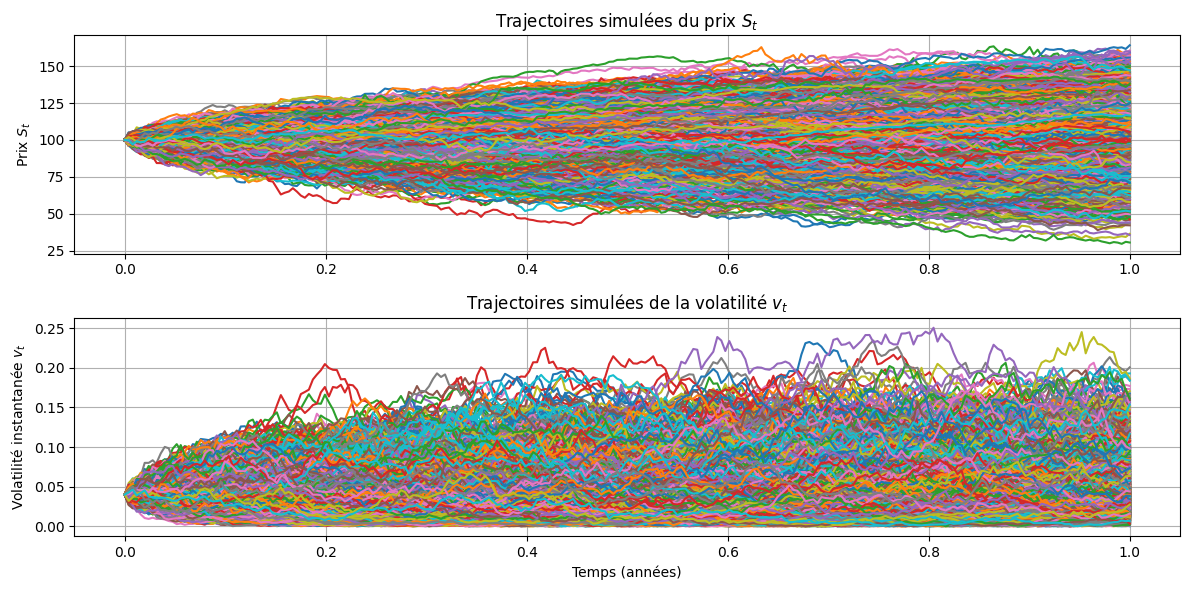

In [5]:
# --- Tracé ---
t = np.linspace(0, T, N)

plt.figure(figsize=(12, 6))

# Graphique 1 : Prix S_t
plt.subplot(2, 1, 1)
plt.plot(t, S)
plt.title("Trajectoires simulées du prix $S_t$")
plt.ylabel("Prix $S_t$")
plt.grid(True)

# Graphique 2 : Volatilité v_t
plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.title("Trajectoires simulées de la volatilité $v_t$")
plt.xlabel("Temps (années)")
plt.ylabel("Volatilité instantanée $v_t$")
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
import torch
import numpy as np

def MonteCarlosEuCallOptionHeston(S0,r,K,Kappa,theta,sigma,sigma0,rho,T,N,nbSimulation):

    S,v=SimulateHestonBrownianMotion(S0,r,Kappa,theta,sigma,sigma0,rho,T,N,nbSimulation)

    CallPayoff = np.maximum(S[-1, :] - K, 0)

    price=np.exp(-r*T)*np.mean(CallPayoff)

    return price


In [7]:
np.random.seed(42)
callprice=MonteCarlosEuCallOptionHeston(S0,r,100,K,theta,sigma,sigma0,rho,T,N,nbSimulation)

In [8]:
print(callprice)

10.331436547237182


In [9]:
import numpy as np
import math
from scipy.stats import norm

def BlackScholesCallPricing(S,K,tau,sigma,r):
    if tau <= 0: 
        return max(0.0, S-K)
    d1 = (math.log(S/K) + (r + 0.5*sigma**2)*tau)/(sigma*math.sqrt(tau))
    d2 = d1 - sigma*math.sqrt(tau)
    return S*norm.cdf(d1) - K*math.exp(-r*tau)*norm.cdf(d2)
    

In [10]:
bsPrice=BlackScholesCallPricing(S0,100,T,np.sqrt(theta),r)

In [11]:
print(bsPrice)

10.450583572185565


In [12]:
import yfinance as yf

# Récupérer les données ^IRX
irx = yf.Ticker("^IRX")

# Prix actuel
prix_actuel = irx.info['regularMarketPrice']
print(f"Prix actuel ^IRX: {prix_actuel}%")



ModuleNotFoundError: No module named 'yfinance'

In [ ]:
import yfinance as yf
ticker = yf.Ticker("AAPL")
opt_dates = ticker.options  
opt_chain = ticker.option_chain(opt_dates[0])  
calls = opt_chain.calls

In [ ]:
print(calls)